In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
theta1 = 5
theta2 = 3.5
theta3 = 7.33

theta1_sample = theta1*np.random.uniform(size=(100, 1000)) 
theta2_sample = theta2*np.random.uniform(size=(100, 1000)) 
theta3_sample = theta3*np.random.uniform(size=(100, 1000))

Определяем функции оценок:

In [3]:
def est1(row):
    return 2*np.mean(row)

def est2(row):
    return (len(row) + 1)*np.min(row)

def est3(row):
    return np.min(row) + np.max(row)

def est4(row):
    return (len(row) + 1)/len(row)*np.max(row)

est_names = ['$2\overline{X}$', '$(n+1)X_{(1)}$', '$X_{(1)} + X_{(n)}$', '$\\frac{n+1}{n}X_{(n)}$']
est_functions = [est1, est2, est3, est4]

Считаем усредненную функцию потерь для всех оценок и для всех размеров выборок. 

In [4]:
def deal_with_theta(theta, sample):
    est_loss_values = [[] for i in range(len(est_functions))]
    for i in range(len(sample[0]))[1:]:
        for j in range(len(est_functions)):
            est_loss_values[j].append(np.mean(np.array(\
                    [(est_functions[j](sample[k][:i]) - theta)**2 for k in range(len(sample))])))
    return est_loss_values

Рисуем потери:

In [5]:
def print_est_loss(est_loss_values, theta, limits=None):
    for i in range(len(est_loss_values)):
        plt.plot(np.array(range(len(est_loss_values[i]))) + 1, est_loss_values[i], label=est_names[i])
    if limits:
        plt.axis(limits)
    plt.legend()
    plt.xlabel('sample size', fontsize=20)
    plt.ylabel('MSE', fontsize=20)
    plt.title('theta = ' + str(theta), fontsize=20)
    plt.show()    

In [6]:
est_loss_values_t1 = deal_with_theta(theta1, theta1_sample)
est_loss_values_t2 = deal_with_theta(theta2, theta2_sample)
est_loss_values_t3 = deal_with_theta(theta3, theta3_sample)

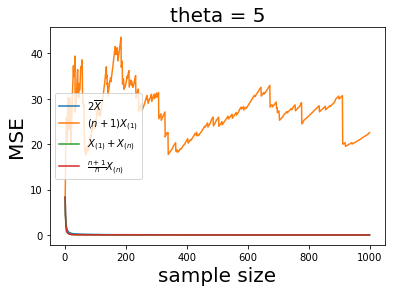

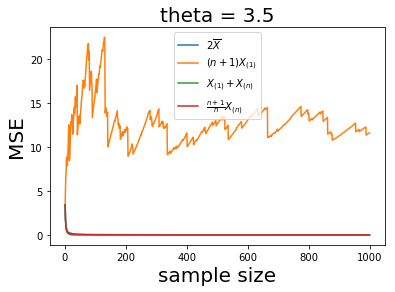

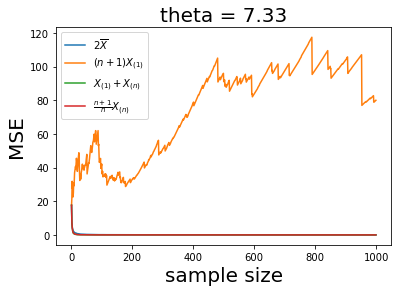

In [7]:
print_est_loss(est_loss_values_t1, theta1)
print_est_loss(est_loss_values_t2, theta2)
print_est_loss(est_loss_values_t3, theta3)

Видим, что вторая оценка имеет большое квадратичное отклонение. Удаляем ее и детализируем остальные.

In [8]:
del est_loss_values_t1[1]
del est_loss_values_t2[1]
del est_loss_values_t3[1]
del est_names[1]

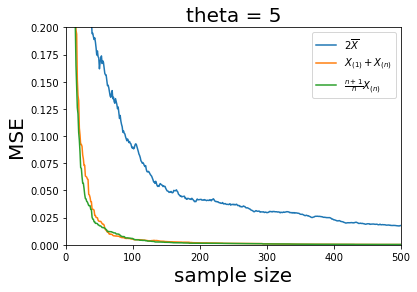

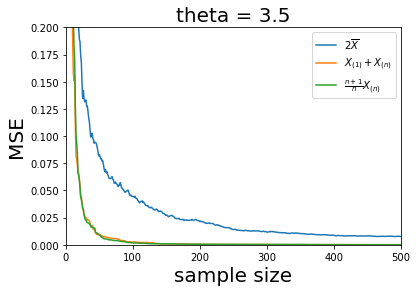

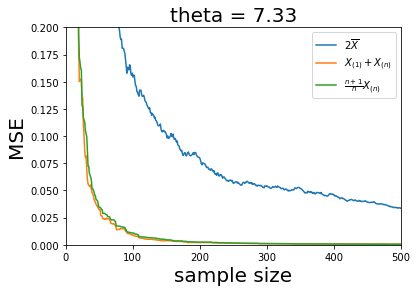

In [9]:
print_est_loss(est_loss_values_t1, theta1, [0, 500, 0, 0.2])
print_est_loss(est_loss_values_t2, theta2, [0, 500, 0, 0.2])
print_est_loss(est_loss_values_t3, theta3, [0, 500, 0, 0.2])

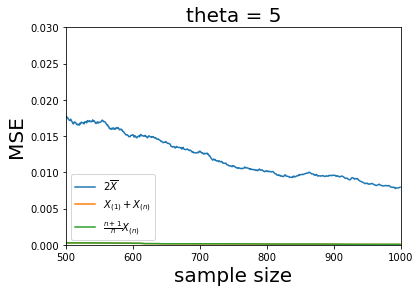

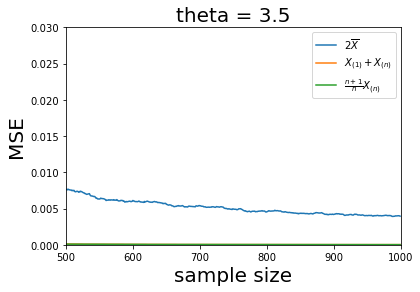

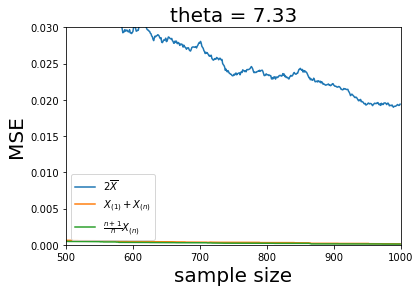

In [10]:
print_est_loss(est_loss_values_t1, theta1, [500, 1000, 0, 0.03])
print_est_loss(est_loss_values_t2, theta2, [500, 1000, 0, 0.03])
print_est_loss(est_loss_values_t3, theta3, [500, 1000, 0, 0.03])

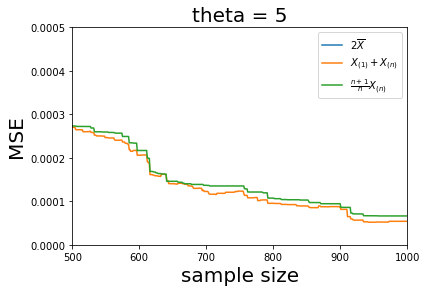

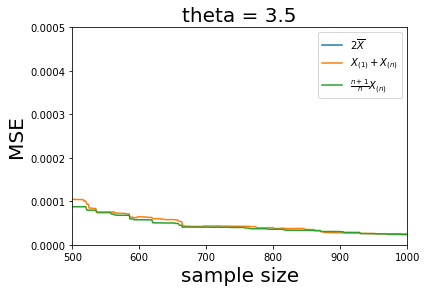

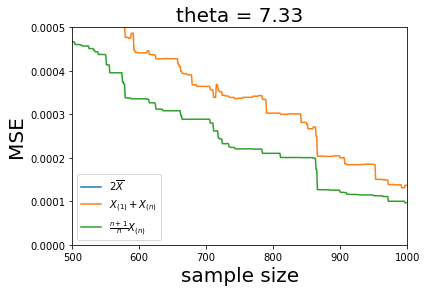

In [11]:
print_est_loss(est_loss_values_t1, theta1, [500, 1000, 0, 0.0005])
print_est_loss(est_loss_values_t2, theta2, [500, 1000, 0, 0.0005])
print_est_loss(est_loss_values_t3, theta3, [500, 1000, 0, 0.0005])